In [172]:
import pandas as pd
import seaborn as sns
from pdc_project import plot
from matplotlib import pyplot as plt
import numpy as np

In [173]:
coolingflow_biotemp = pd.read_excel("20230207_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("20230207_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("20230207_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("20230207_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))

Step     0.000e+00 ± 1.423e+01
Kp      -1.467e-03 ± 3.901e-05
Tau      6.396e+00 ± 1.104e-03
Td       1.853e-03 ± 5.703e-05
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      7.968e-04 ± 2.649e-05
Tau     1.776e+01 ± 2.838e-02
Td      8.098e+00 ± 9.755e-03
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      4.175e-05 ± 1.547e-06
Tau     1.843e+01 ± 3.244e-01
Td      5.852e+00 ± 5.798e-02
dtype: object

Step    0.000e+00 ± 1.423e+01
Kp      2.811e-04 ± 1.039e-05
Tau     2.683e+01 ± 4.872e-01
Td      3.144e+00 ± 5.694e-02
dtype: object

In [174]:
coolingflow_biotemp = pd.read_excel("20230208_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("20230208_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("20230208_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("20230208_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.3e} ± {:.3e}".format(x.mean(), x.sem())))

Step     0.000e+00 ± 1.010e+01
Kp      -1.467e-03 ± 2.764e-05
Tau      6.396e+00 ± 7.744e-04
Td       1.853e-03 ± 3.711e-05
dtype: object

Step    0.000e+00 ± 1.010e+01
Kp      7.965e-04 ± 1.876e-05
Tau     1.774e+01 ± 1.961e-02
Td      8.104e+00 ± 7.575e-03
dtype: object

Step    0.000e+00 ± 1.010e+01
Kp      4.173e-05 ± 1.095e-06
Tau     1.842e+01 ± 2.297e-01
Td      5.852e+00 ± 4.111e-02
dtype: object

Step    0.000e+00 ± 1.010e+01
Kp      2.809e-04 ± 7.353e-06
Tau     2.683e+01 ± 3.451e-01
Td      3.144e+00 ± 4.033e-02
dtype: object

In [180]:
def summary(df, title = "", relative = False):
    df = df.copy()
    vals = ["Kp", "Tau", "Td"]
    if relative:
        df[vals]= df[vals]/df[vals].mean().abs()
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(10,3)
    mean = df.mean()
    sem = df.sem()
    std = df.std()
    for i in range(3):
        val = vals[i]
        sns.lineplot(df, x = "Step", y = val, ax = ax[i])
        ax[i].set_title(title)
        ax[i].axhspan(mean[val]-sem[val], mean[val]+sem[val], alpha=0.2)
        ax[i].axhspan(mean[val]-std[val], mean[val]+std[val], alpha=0.2)
        if relative and mean[val] > 0:
            ax[i].set_ylim([0,2])
        elif relative and mean[val] < 0: 
                ax[i].set_ylim([-2,0])
    return fig, ax

In [181]:
coolingflow_biotemp.sem()

Step    10.100843
Kp       0.000028
Tau      0.000774
Td       0.000037
dtype: float64

(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Kp'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Tau'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Td'>],
       dtype=object))

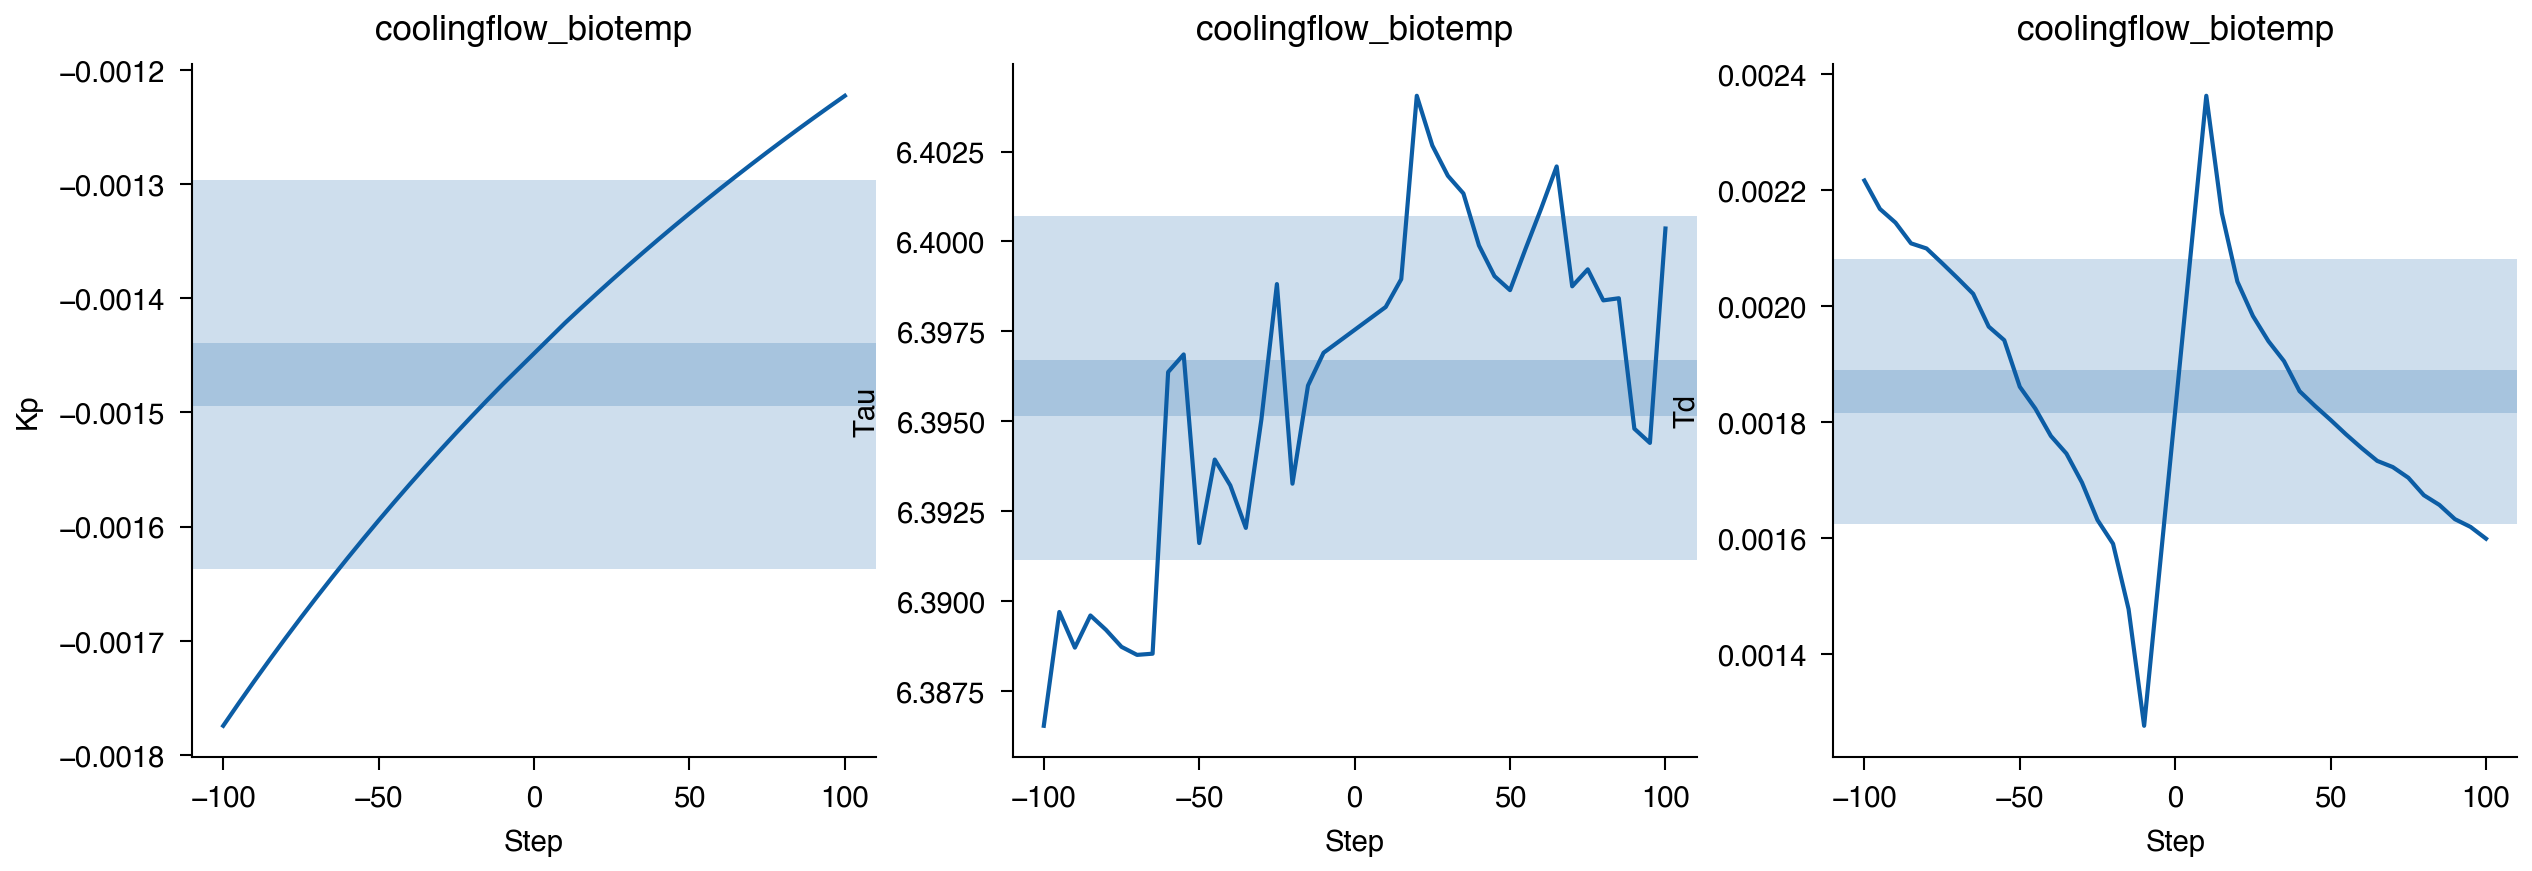

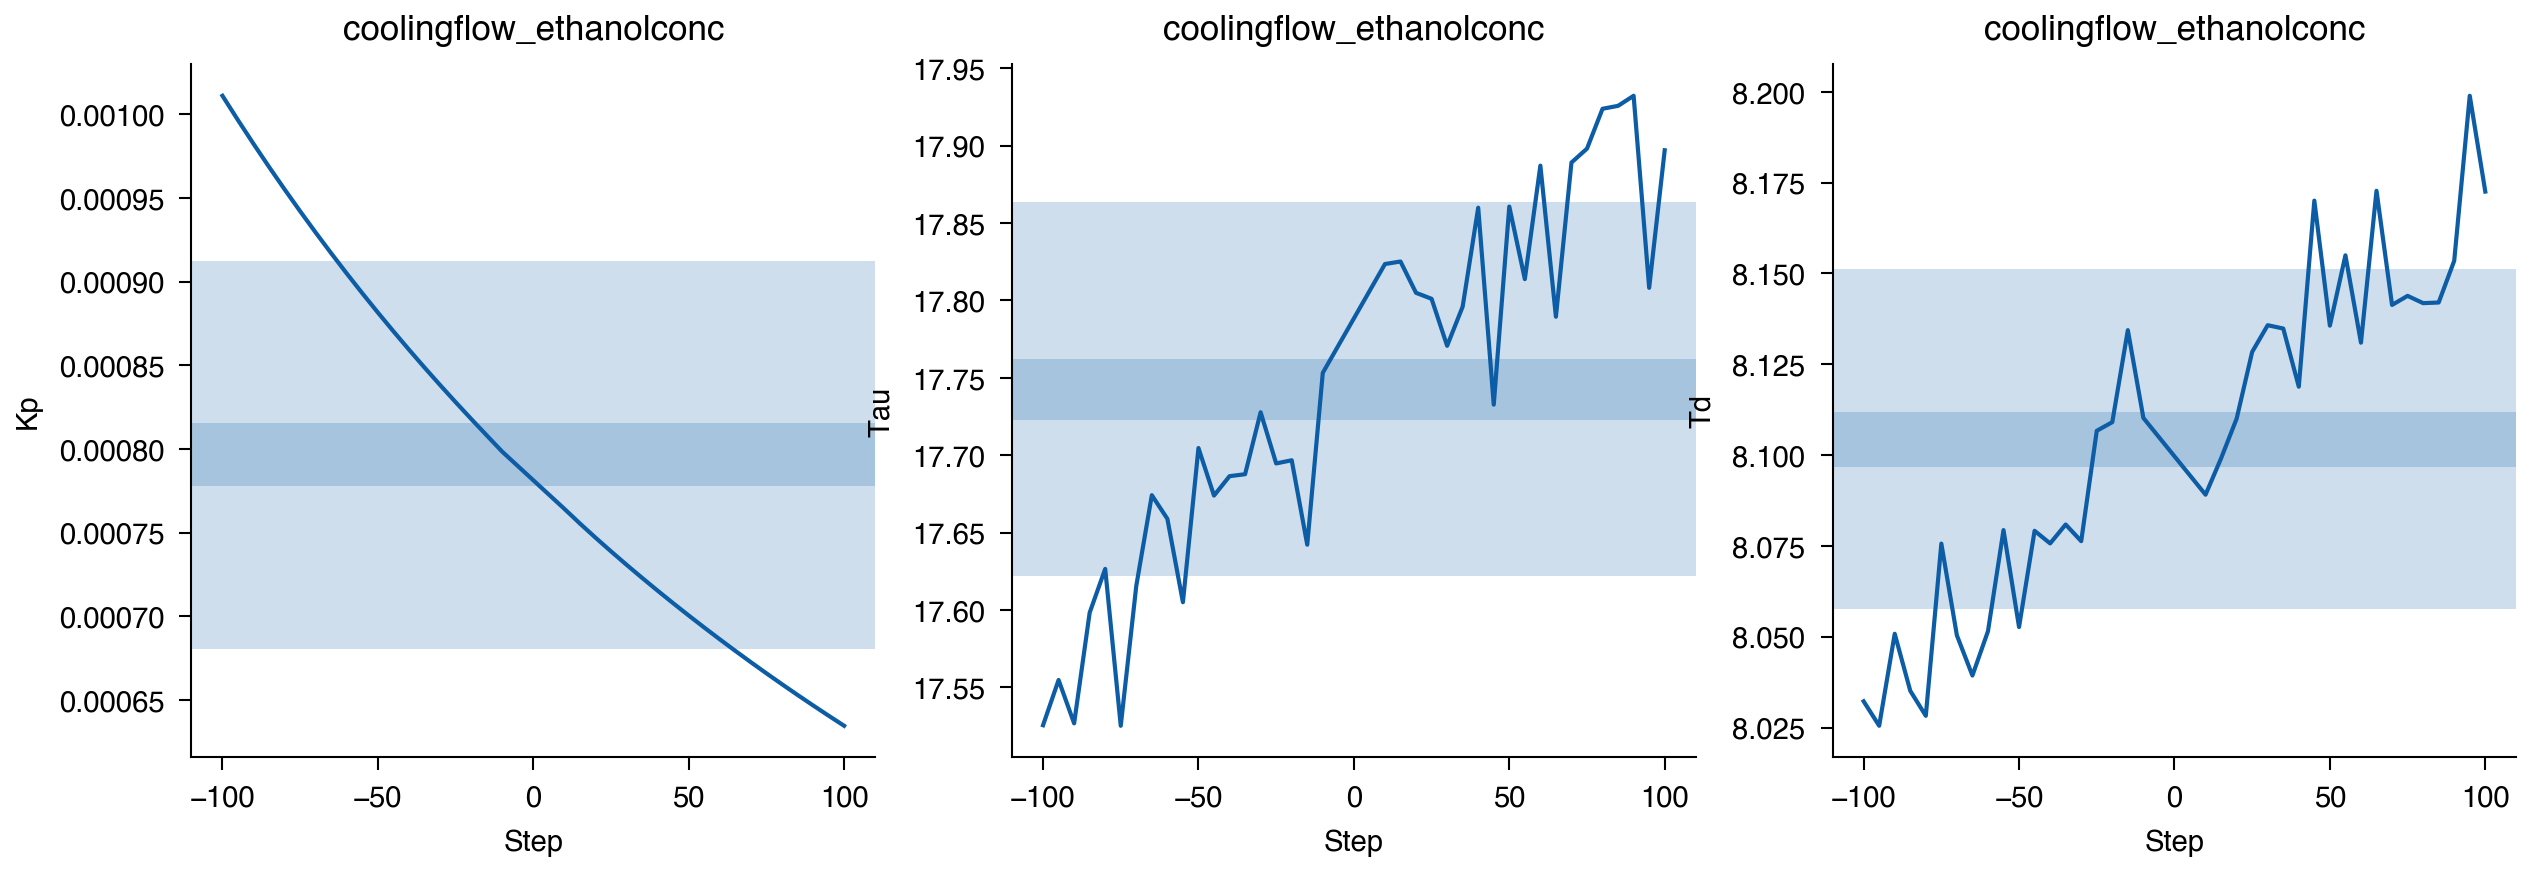

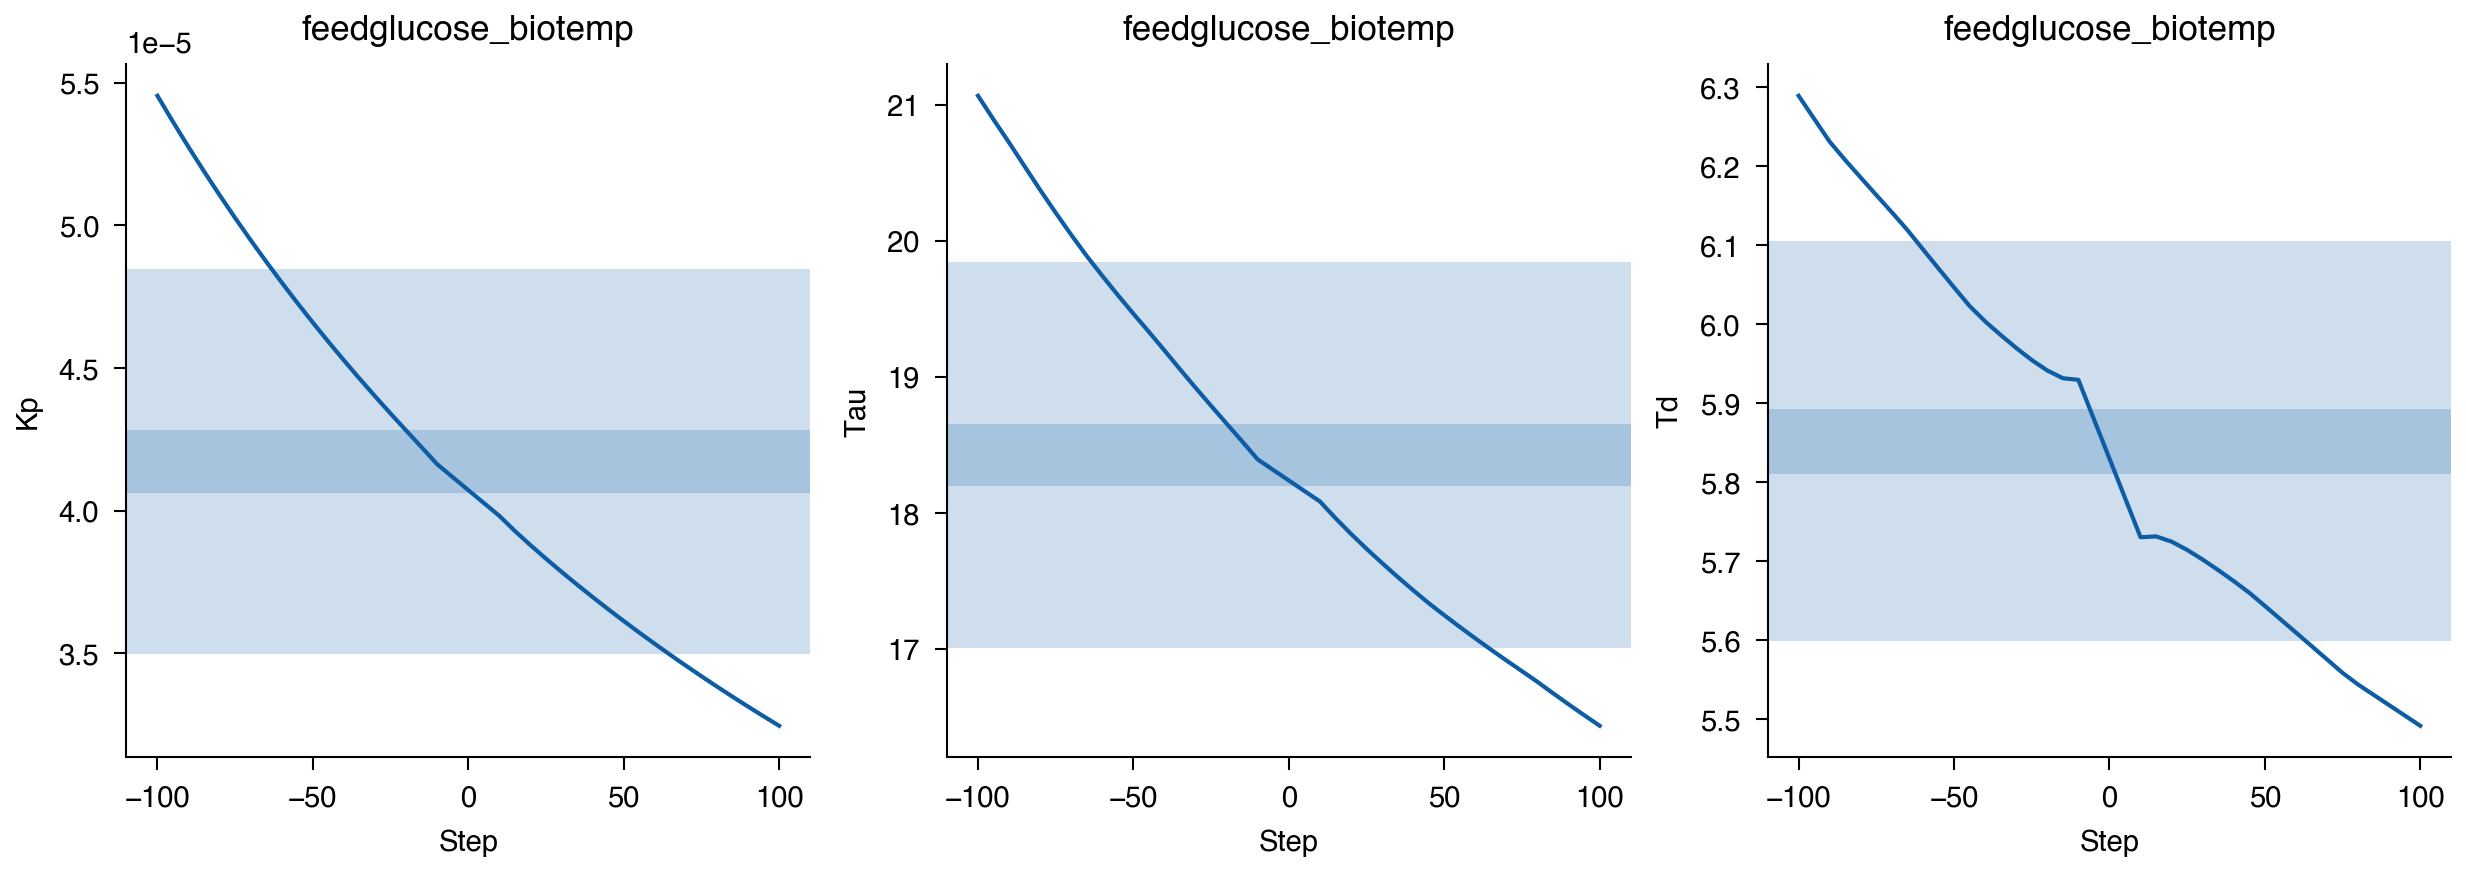

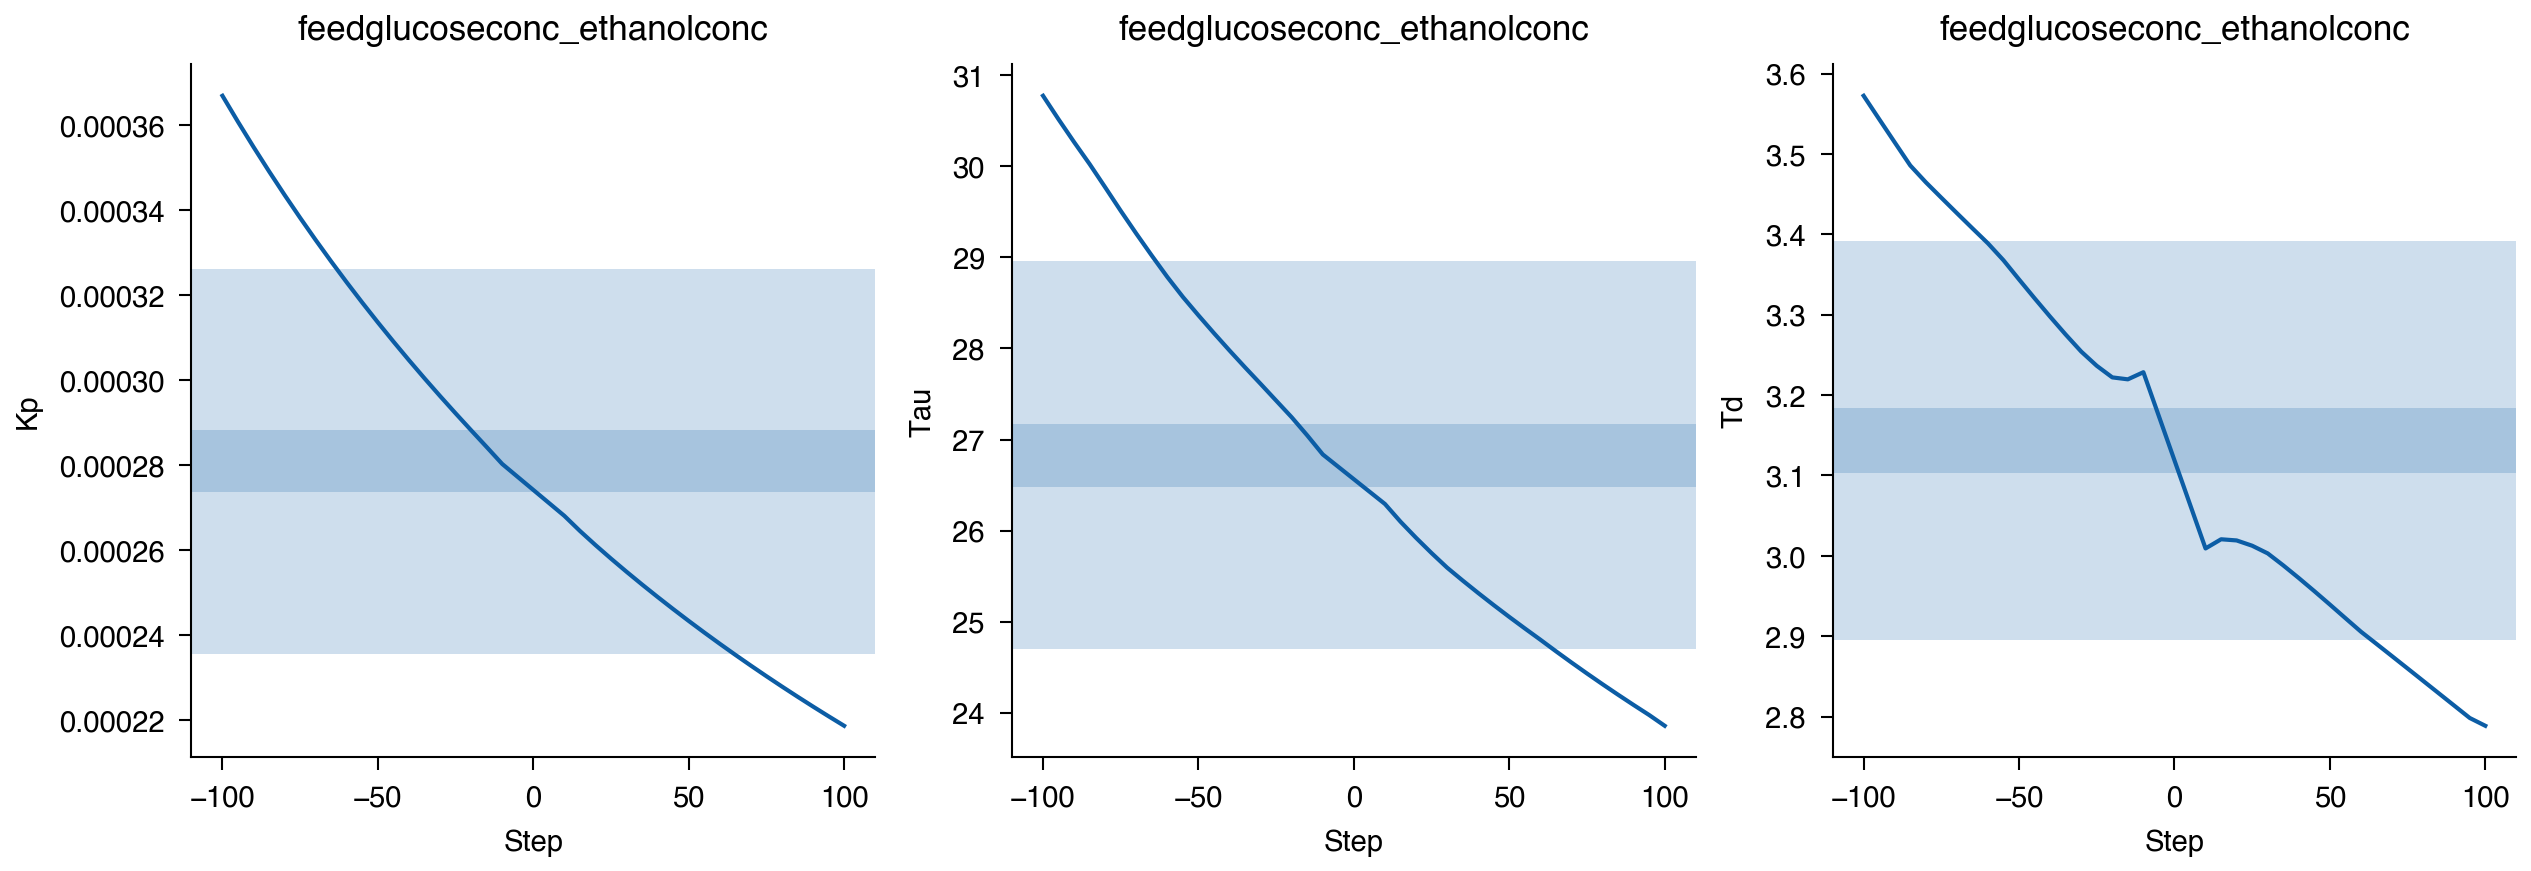

In [182]:
summary(coolingflow_biotemp, "coolingflow_biotemp")
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc")
summary(feedglucose_biotemp, "feedglucose_biotemp")
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc")


(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Kp'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Tau'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Step', ylabel='Td'>],
       dtype=object))

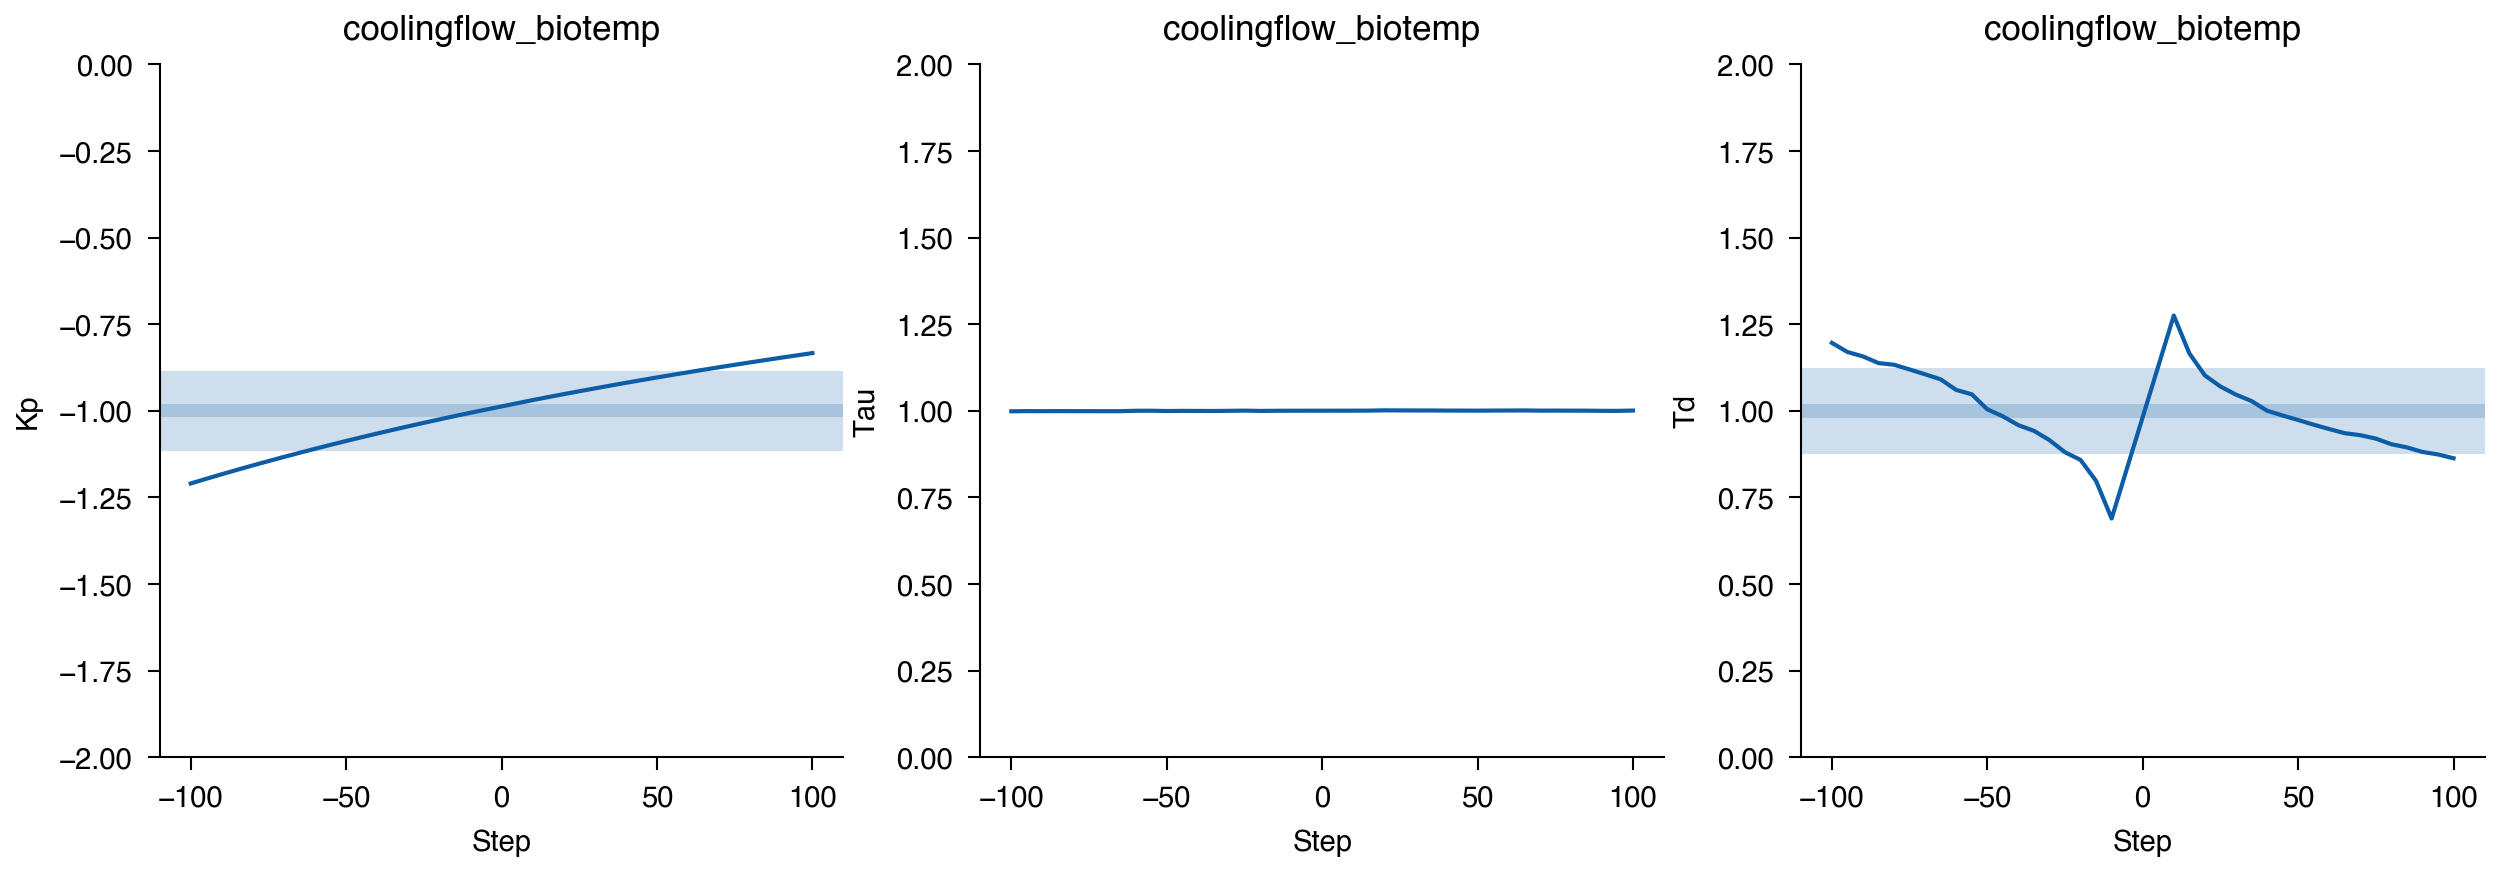

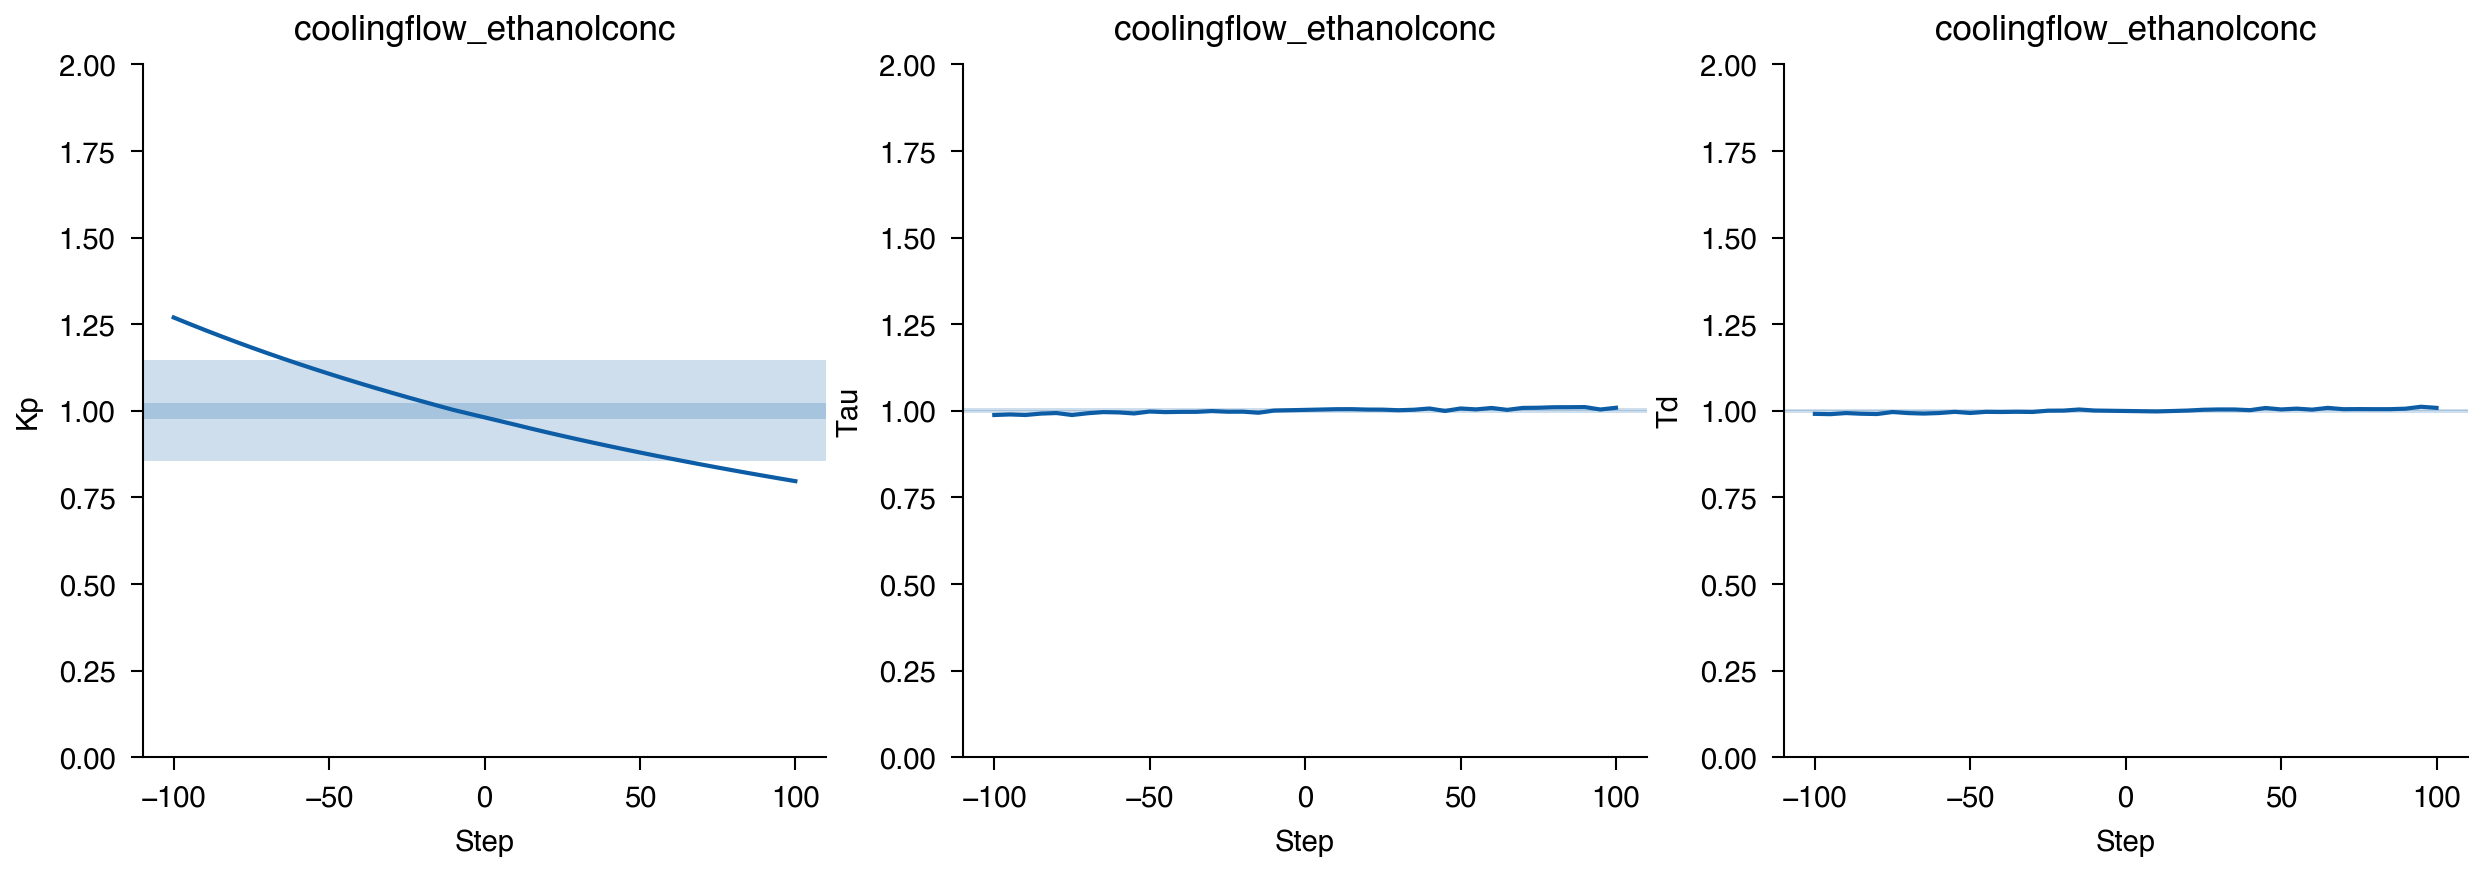

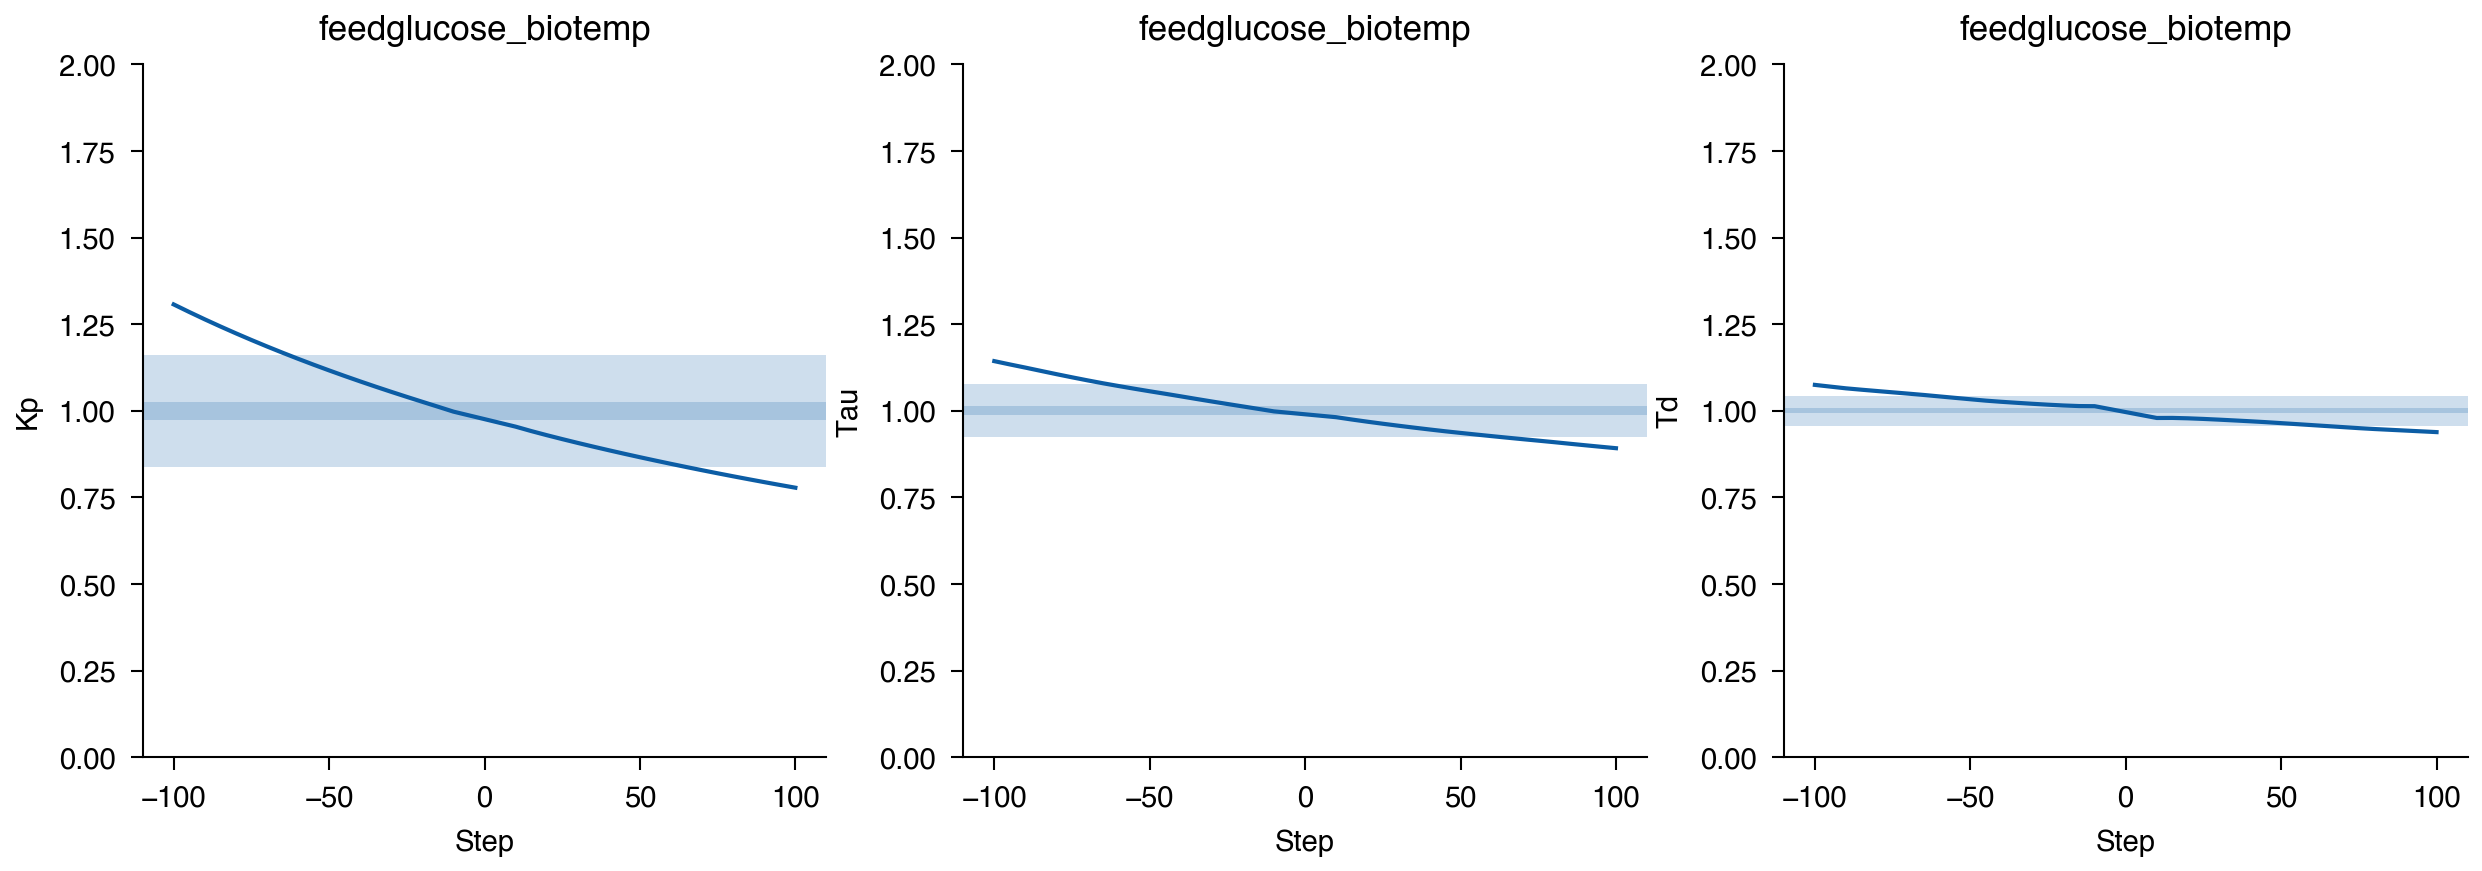

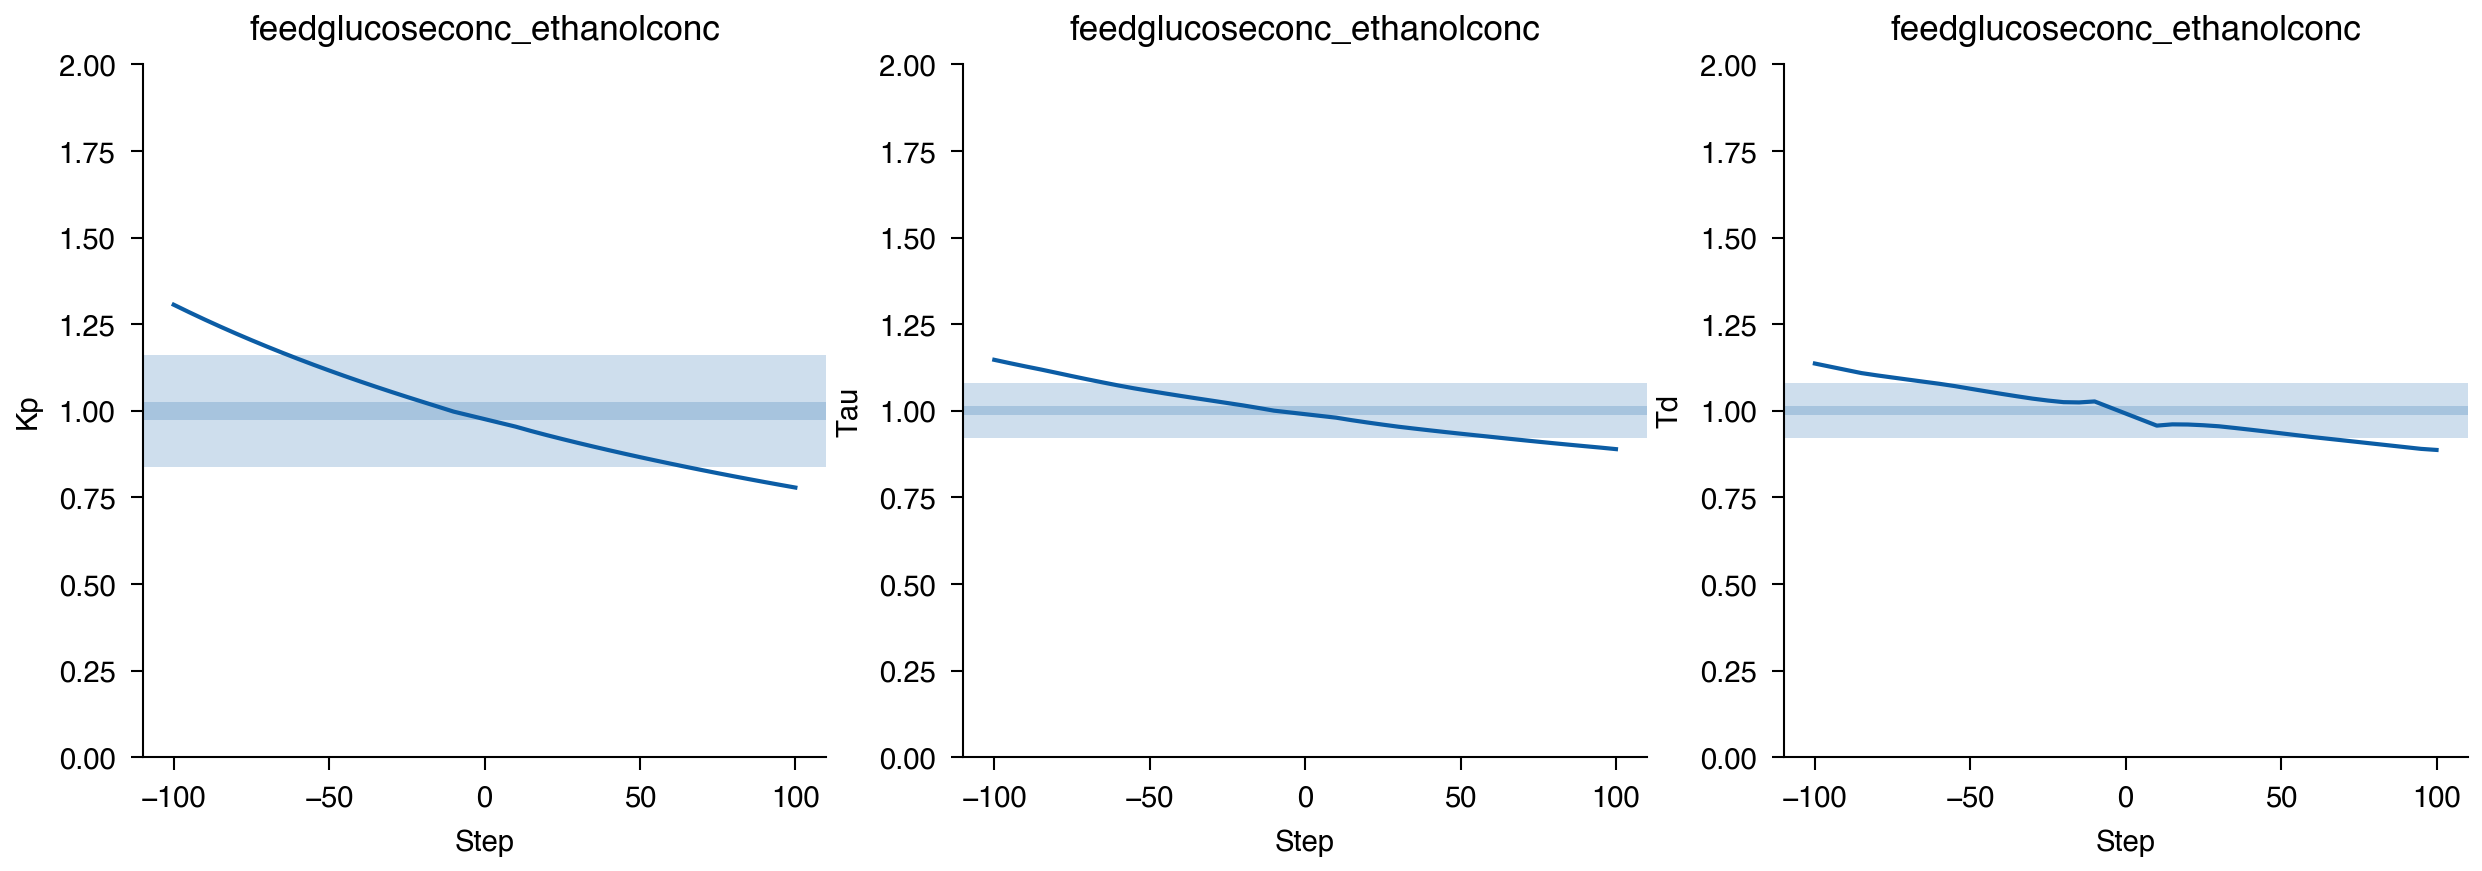

In [183]:
summary(coolingflow_biotemp, "coolingflow_biotemp", True)
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc", True)
summary(feedglucose_biotemp, "feedglucose_biotemp", True)
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc", True)
